In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd 
import seaborn as sns

 # Задание 1
Даны выборки,соответствующие дневным температурам в Мельбурне и Сиднее в феврале. Для обеих выборок

1. Постройте полигон частот, диаграмму«ящик с усами»;гистограмму 
2. Запишите статистический ряд, изобразите эмпирическую функцию распределения;
3. Вычислите выборочное среднее, выборочную дисперсию и исправленную выборочную дисперсию,стандартное отклонение.

In [ ]:
Mel = np.array([26, 35, 23, 27, 26, 25, 33, 26, 25, 29, 30, 28, 24, 28, 23, 21, 24, 32, 27, 23, 24, 24, 23, 31, 32, 35, 23, 23 ])
Syd = np.array([28, 28, 29, 29, 30, 27, 30, 25, 24, 25, 24, 29, 26, 28, 29, 31, 23, 26, 29, 31, 26, 27, 26, 27, 25, 29, 37, 25])

Вариационные ряды

In [ ]:
Mel.sort()
Syd.sort()
print(Mel)
print(Syd)

[21 23 23 23 23 23 23 24 24 24 24 25 25 26 26 26 27 27 28 28 29 30 31 32
 32 33 35 35]
[23 24 24 25 25 25 25 26 26 26 26 27 27 27 28 28 28 29 29 29 29 29 29 30
 30 31 31 37]


In [ ]:
df = pd.DataFrame({'Melbourne': Mel, 'Sydney': Syd})

In [ ]:
df.describe()

,Melbourne,Sydney
count,28.000000,28.000000
mean,26.785714,27.607143
std,3.956777,2.858895
min,21.000000,23.000000
25%,23.750000,25.750000
50%,26.000000,27.500000
75%,29.250000,29.000000
max,35.000000,37.000000


### 1. Постройте полигон частот, диаграмму«ящик с усами»;гистограмму 
Ещё дополнительно построим violinplot для сравнения с boxplot(ящик с усами)

Создадим столбец с уникальными значениями 

In [ ]:
df_freq = pd.DataFrame({'Values': list(set(Mel) | set(Syd))})
df_freq

,Values
0,21
1,23
2,24
3,25
4,26
5,27
6,28
7,29
8,30
9,31


Подсчитаем эмпирическую(наблюдаемую) частоту

In [ ]:
Sydney_fr  = pd.DataFrame(df['Sydney'].value_counts())
Sydney_fr

,Sydney
29,6
25,4
26,4
27,3
28,3
24,2
30,2
31,2
23,1
37,1


In [ ]:
Melbourne_fr = pd.DataFrame(df['Melbourne'].value_counts())
Melbourne_fr

,Melbourne
23,6
24,4
26,3
25,2
27,2
28,2
32,2
35,2
21,1
29,1


Объединим частотность значений Melbourne, Sydney по значениям

In [ ]:
Val_Melb = df_freq.merge(Melbourne_fr, left_on='Values', right_index=True, how='outer') # Объединяем левый DF(Val_Melb) по Values, а правый Df(Melbourne_fr) по индексу 
df_freq = Val_Melb.merge(Sydney_fr, left_on='Values', right_index=True, how='outer') # Объединяем левый DF(Val_Melb) по Values, а правый Df(Sydney_fr) по индексу 
df_freq.set_index('Values',inplace=True) # Делаем индексом колонку "Values"
#df_freq.fillna(0, inplace=True) # Заполняем Nan-ы нулями
df_freq

,Melbourne,Sydney
Values,,
21,1.0,NaN
23,6.0,1.0
24,4.0,2.0
25,2.0,4.0
26,3.0,4.0
27,2.0,3.0
28,2.0,3.0
29,1.0,6.0
30,1.0,2.0


In [ ]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

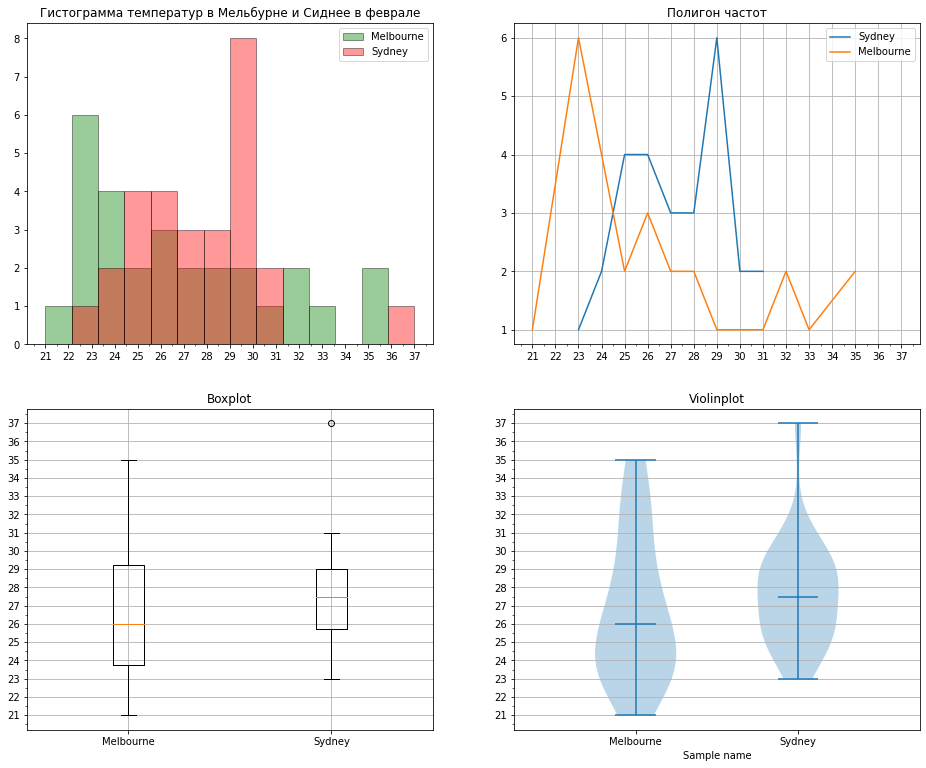

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16, 13))
# Отобразим частотность температур в Мельбурне и Сиднее на одном графике (гистограмма)
axes[0, 0].hist(x=Mel, range=(df_freq.index.values.min(), df_freq.index.values.max()),
          alpha=0.4, bins=len(df_freq.index), color='green', edgecolor='black', label='Melbourne')
axes[0, 0].hist(x=Syd, range=(df_freq.index.values.min(), df_freq.index.values.max()),
          alpha=0.4, bins=len(df_freq.index), color='red', edgecolor='black', label='Sydney')
axes[0, 0].set_title('Гистограмма температур в Мельбурне и Сиднее в феврале')
axes[0, 0].legend() # Выводим легенду
#  Устанавливаем интервал основных делений:
axes[0, 0].xaxis.set_major_locator(ticker.MultipleLocator(1))
#  Устанавливаем интервал вспомогательных делений:
axes[0, 0].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))

#------------------------------------------------------------------------------
axes[0, 1].plot(df_freq.index.values, df_freq.Sydney.values, label = 'Sydney')
axes[0, 1].plot(df_freq.index.values, df_freq.Melbourne.values, label = 'Melbourne')

axes[0, 1].set_title('Полигон частот')
axes[0, 1].grid() # Добавим сетку
axes[0, 1].legend() # Выводим легенду
#  Устанавливаем интервал основных делений:
axes[0, 1].xaxis.set_major_locator(ticker.MultipleLocator(1))
#  Устанавливаем интервал вспомогательных делений:
axes[0, 1].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))

#------------------------------------------------------------------------------
axes[1, 0].boxplot(x = [Mel, Syd], labels = ['Melbourne', 'Sydney'])
# axes[1, 0].boxplot(Syd)

axes[1, 0].set_title('Boxplot')
axes[1, 0].grid() # Добавим сетку
#  Устанавливаем интервал основных делений:
axes[1, 0].yaxis.set_major_locator(ticker.MultipleLocator(1))
#  Устанавливаем интервал вспомогательных делений:
axes[1, 0].yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

#------------------------------------------------------------------------------
axes[1, 1].violinplot(dataset = [Mel, Syd], points=100, widths=0.5, showmedians=True)

axes[1, 1].set_title('Violinplot')
axes[1, 1].grid(axis='y') # Добавим сетку
#  Устанавливаем интервал основных делений:
axes[1, 1].yaxis.set_major_locator(ticker.MultipleLocator(1))
#  Устанавливаем интервал вспомогательных делений:
axes[1, 1].yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

set_axis_style(axes[1, 1], ['Melbourne', 'Sydney'])



### 2. Запишите статистический ряд, изобразите эмпирическую функцию распределения;

Статистический ряд

In [ ]:
df_freq['Melbourne_stat'] = df_freq['Melbourne']/df_freq['Melbourne'].sum()
df_freq['Sydney_stat'] = df_freq['Sydney']/df_freq['Sydney'].sum()

In [ ]:
df_freq

,Melbourne,Sydney,Melbourne_stat,Sydney_stat
Values,,,,
21,1.0,NaN,0.035714,NaN
23,6.0,1.0,0.214286,0.035714
24,4.0,2.0,0.142857,0.071429
25,2.0,4.0,0.071429,0.142857
26,3.0,4.0,0.107143,0.142857
27,2.0,3.0,0.071429,0.107143
28,2.0,3.0,0.071429,0.107143
29,1.0,6.0,0.035714,0.214286
30,1.0,2.0,0.035714,0.071429


Эмпирическая функция распределения + кумулята распределения 

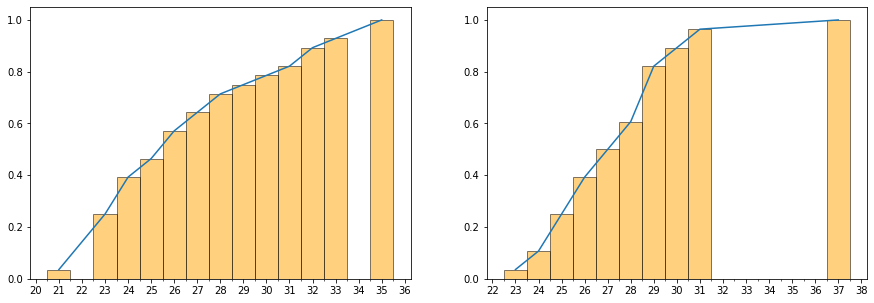

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
axes[0].bar(df_freq[~ df_freq['Melbourne'].isna()].index, df_freq.Melbourne_stat.cumsum().dropna(), width=1, edgecolor='black', alpha=0.5, color='orange' )
axes[0].plot(df_freq[~ df_freq['Melbourne'].isna()].index, df_freq.Melbourne_stat.cumsum().dropna())
#  Устанавливаем интервал основных делений:
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
#  Устанавливаем интервал вспомогательных делений:
axes[0].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))

axes[1].bar(df_freq[~ df_freq['Sydney'].isna()].index, df_freq.Sydney_stat.cumsum().dropna(), width=1, edgecolor='black', alpha=0.5, color='orange' )
axes[1].plot(df_freq[~ df_freq['Sydney'].isna()].index, df_freq.Sydney_stat.cumsum().dropna())
#  Устанавливаем интервал основных делений:
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
#  Устанавливаем интервал вспомогательных делений:
axes[1].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))

### 3. Вычислите выборочное среднее, выборочную дисперсию и исправленную выборочную дисперсию,стандартное отклонение.

Выборочное среднее: $\overline{x} = \mu^* = \frac{1}{n}\sum x_i n_i $ \\


In [ ]:
Mel_x_i_n_i = df_freq.Melbourne.values * df_freq.index.values
Mel_x_i_n_i = Mel_x_i_n_i[~np.isnan(Mel_x_i_n_i)]
Mel_x_i_n_i

array([ 21., 138.,  96.,  50.,  78.,  54.,  56.,  29.,  30.,  31.,  64.,
        33.,  70.])

In [ ]:
Syd_x_i_n_i = df_freq.Sydney.values * df_freq.index.values
Syd_x_i_n_i = Syd_x_i_n_i[~np.isnan(Syd_x_i_n_i)]
Syd_x_i_n_i

array([ 23.,  48., 100., 104.,  81.,  84., 174.,  60.,  62.,  37.])

In [ ]:
Mel_mu = sum(Mel_x_i_n_i) / len(Mel)
Syd_mu = sum(Syd_x_i_n_i) / len(Syd)
print('Выборочное среднее для Melbourne: ', Mel_mu)
print('Выборочное среднее для Sydney: ', Syd_mu)

Выборочное среднее для Melbourne:  26.785714285714285
Выборочное среднее для Sydney:  27.607142857142858


Выборочная дисперсия: $σ^{2^*}=\frac{1}{n}\sum(x_i - \overline{x})^2 \cdot n_i = \frac{1}{n} \sum x_i^2 \cdot n_i + \overline{x}^2 $

In [ ]:
Mel_x_i_2_n_i = (df_freq.index.values)**2 * df_freq.Melbourne.values
Mel_x_i_2_n_i = Mel_x_i_2_n_i[~np.isnan(Mel_x_i_2_n_i)]
Mel_sigma_2 = sum(Mel_x_i_2_n_i)/len(Mel) - Mel_mu**2

Syd_x_i_2_n_i = (df_freq.index.values)**2 * df_freq.Sydney.values
Syd_x_i_2_n_i = Syd_x_i_2_n_i[~np.isnan(Syd_x_i_2_n_i)]
Syd_sigma_2 = sum(Syd_x_i_2_n_i)/len(Syd) - Syd_mu**2

In [ ]:
print('Выборочная дисперсия Melbourne: ', Mel_sigma_2)
print('Выборочная дисперсия Sydney: ', Syd_sigma_2)

Выборочная дисперсия Melbourne:  15.096938775510239
Выборочная дисперсия Sydney:  7.881377551020478


Исправленная выборочная дисперсия: $s^2 = \frac{1}{n-1}∑ (x_i - \overline{x})^2 \cdot n_i$ \\

Стандартное отклонение: 
$ s = \sqrt{s^2} = \sqrt{\frac{1}{n-1} \sum (x_i-\overline{x})^2 \cdot n_i}$

In [ ]:
Mel_s_2 = (Mel_sigma_2*len(Mel))/(len(Mel)-1)
Mel_s = np.sqrt(Mel_s_2)

Syd_s_2 = (Syd_sigma_2*len(Syd))/(len(Syd)-1)
Syd_s = np.sqrt(Syd_s_2)



print('Исправленная выборочная дисперсия Melbourne: ', Mel_s_2)
print('Стандартное отклонение Melbourne: ', Mel_s)

print('Исправленная выборочная дисперсия Sydney: ', Syd_s_2)
print('Стандартное отклонение Sydney: ', Syd_s)

Исправленная выборочная дисперсия Melbourne:  15.656084656084692
Стандартное отклонение Melbourne:  3.9567770541293696
Исправленная выборочная дисперсия Sydney:  8.173280423280495
Стандартное отклонение Sydney:  2.85889496541592
